## Case Study-1
The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 
Dataset: cars-dataset
Attribute Information:
Car Name – Name of the car
Cyl – No of cylinders in the car – Multivalued discrete
Disp – Displacement – continuous
Hp – Horsepower – continuous
Wt – Weight – continuous
Acc – Accleration – continuous
Yr – Model of the car – Multivalued discrete
Steps to follow:
1.	EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
2.	Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3.	Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
4.	Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)


In [81]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [82]:
import warnings;
warnings.simplefilter('ignore')

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [84]:
cars = pd.read_csv('cars-dataset.csv', index_col='car name')

In [85]:
cars.head()
cars.index
cars.columns
cars.dtypes

cyl   disp   hp    wt   acc  yr   mpg
car name                                                        
chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
buick skylark 320            8  350.0  165  3693  11.5  70  15.0
plymouth satellite           8  318.0  150  3436  11.0  70  18.0
amc rebel sst                8  304.0  150  3433  12.0  70  16.0
ford torino                  8  302.0  140  3449  10.5  70  17.0

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=398)

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [86]:
#Check if there are any null values in the dataset
cars.isnull().any()

cyl     False
disp    False
hp      False
wt      False
acc     False
yr      False
mpg     False
dtype: bool

In [87]:
cars.shape

(398, 7)

In [88]:
#Lets have a look on the hp column
cars.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [89]:
#We could see that the column has some values as '?'
#Need to remove the rows having hp='?'
cars = cars[cars.hp != '?']

In [90]:
cars.shape

(392, 7)

In [91]:
#6 rows have been removed corresponding to the hp value being '?''


In [92]:
cars.describe().T

count         mean         std     min       25%      50%       75%  \
cyl   392.0     5.471939    1.705783     3.0     4.000     4.00     8.000   
disp  392.0   194.411990  104.644004    68.0   105.000   151.00   275.750   
wt    392.0  2977.584184  849.402560  1613.0  2225.250  2803.50  3614.750   
acc   392.0    15.541327    2.758864     8.0    13.775    15.50    17.025   
yr    392.0    75.979592    3.683737    70.0    73.000    76.00    79.000   
mpg   392.0    23.445918    7.805007     9.0    17.000    22.75    29.000   

         max  
cyl      8.0  
disp   455.0  
wt    5140.0  
acc     24.8  
yr      82.0  
mpg     46.6

In [93]:
cars.dtypes


cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [94]:
#We could see that hp is of object type. we need to change it to float
cars.hp = cars.hp.astype('float')
cars.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [95]:
#Lets scale the data using Zscore which will help us to visualize the datset better
from scipy.stats import zscore
cars1 = cars.apply(zscore)
cars1.head()

cyl      disp        hp        wt       acc  \
car name                                                                      
chevrolet chevelle malibu  1.483947  1.077290  0.664133  0.620540 -1.285258   
buick skylark 320          1.483947  1.488732  1.574594  0.843334 -1.466724   
plymouth satellite         1.483947  1.182542  1.184397  0.540382 -1.648189   
amc rebel sst              1.483947  1.048584  1.184397  0.536845 -1.285258   
ford torino                1.483947  1.029447  0.924265  0.555706 -1.829655   

                                 yr       mpg  
car name                                       
chevrolet chevelle malibu -1.625315 -0.698638  
buick skylark 320         -1.625315 -1.083498  
plymouth satellite        -1.625315 -0.698638  
amc rebel sst             -1.625315 -0.955212  
ford torino               -1.625315 -0.826925

Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

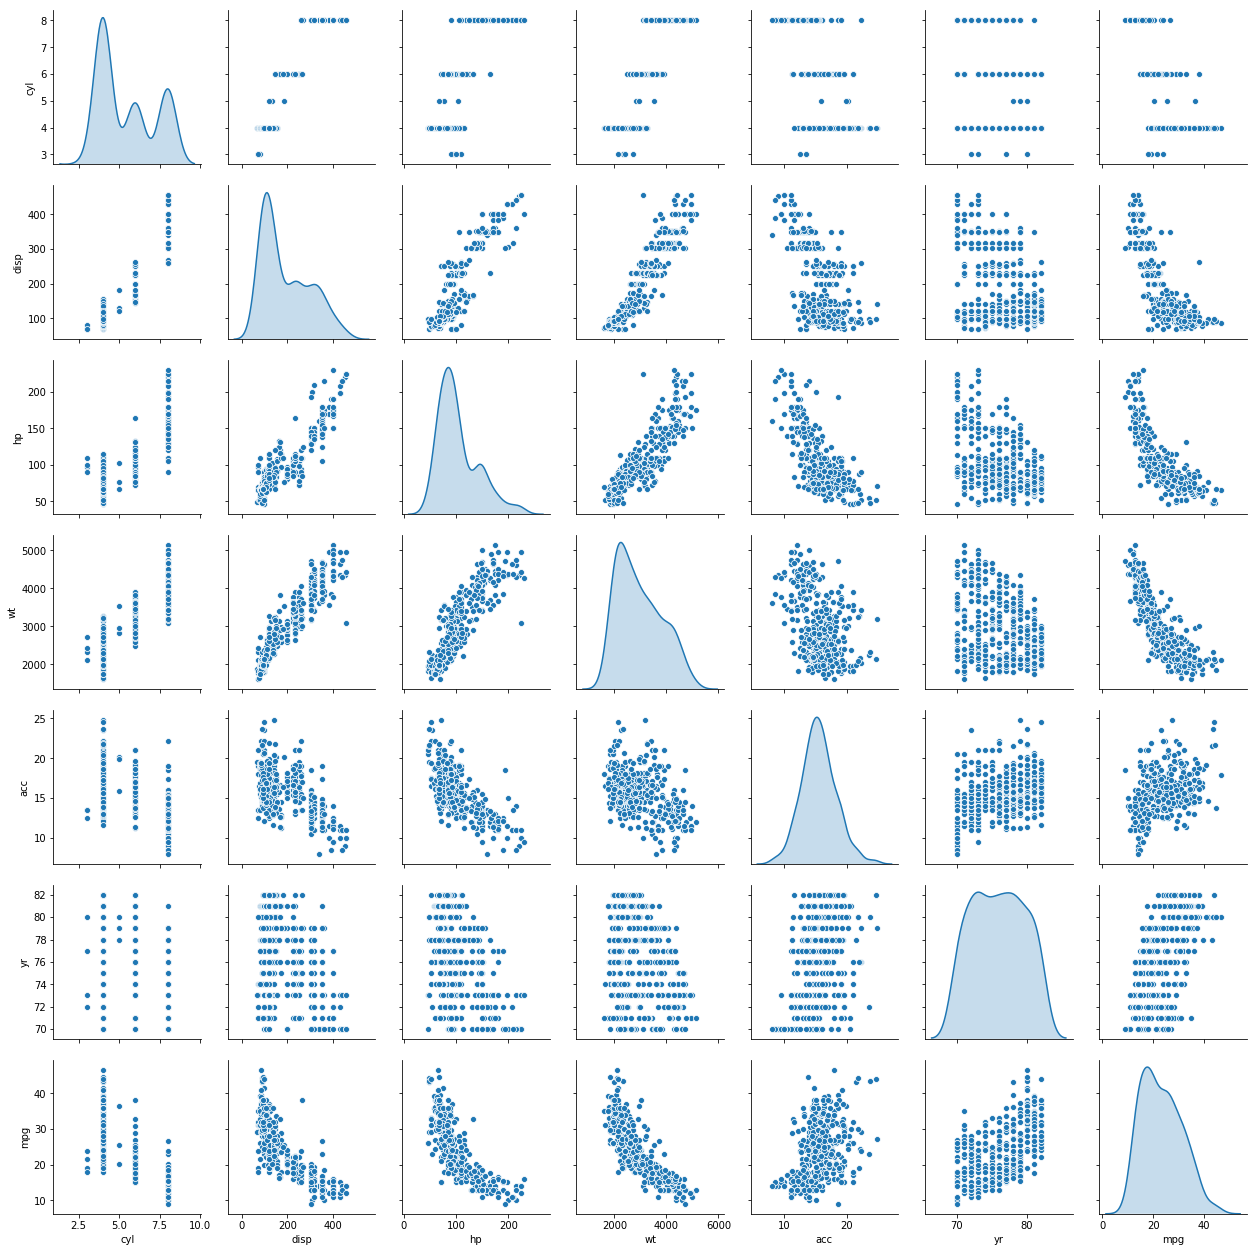

In [96]:
sns.pairplot(data=cars,diag_kind='kde')

In [97]:
#The data distribution across various dimensions except 'Acc' do not look normal
#Close observation between 'mpg' and other attributes indicate the relationship is not really linear
#relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy
#'MPG' and 'YR' have a positive relationship
#"mpg" seems negatively correlated to "disp","hp" & "wt" and positively correlated to "acc" and YR
#Except for Acc we can see that there exists atleast 2 and max of 3 gaussian acrros the attributes, which means there can be groups present inside the dataset
#MPG is low when no. of cylinders is 8 and is more when the no. of cylinders is somehwre around 4 and 5

In [98]:
cars.loc[cars.mpg == cars.mpg.min()]

cyl   disp     hp    wt   acc  yr  mpg
car name                                        
hi 1200d    8  304.0  193.0  4732  18.5  70  9.0

In [99]:
cars.loc[cars.mpg == cars.mpg.max()]

cyl  disp    hp    wt   acc  yr   mpg
car name                                        
mazda glc    4  86.0  65.0  2110  17.9  80  46.6

Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.metrics import mean_squared_error
from math import sqrt

In [101]:
from scipy.spatial.distance import cdist
clusters=range(1,7)
Distortions=[]

In [102]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cars1)
    #print(model.cluster_centers_)
    prediction=model.predict(cars1)
    Distortions.append(sum(np.min(cdist(cars1, model.cluster_centers_, 'euclidean'), axis=1)) / cars1.shape[0])
    Distortions

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[2.4599540277021017]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[2.4599540277021017, 1.6934623956814503]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[2.4599540277021017, 1.6934623956814503, 1.4306047581142727]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[2.4599540277021017,
 1.6934623956814503,
 1.4306047581142727,
 1.2510481571820475]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[2.4599540277021017,
 1.6934623956814503,
 1.4306047581142727,
 1.2510481571820475,
 1.1917371978635267]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[2.4599540277021017,
 1.6934623956814503,
 1.4306047581142727,
 1.2510481571820475,
 1.1917371978635267,
 1.1328591167016373]

Text(0.5, 0, 'k')

Text(0, 0.5, 'Average distortion')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

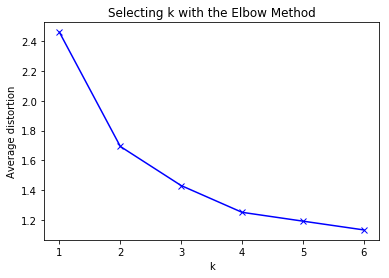

In [103]:
plt.plot(clusters, Distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

from the elbow graph we can see that 3 clusters are sufficient for this dataset

In [104]:
final_model=KMeans(2)
final_model.fit(cars1)
prediction=final_model.predict(cars1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [105]:
#a=final_model.fit(cars1).labels_
#print(a)

In [106]:
cars2= cars1
cars2['Group'] = prediction
cars2.head()
cars2.Group.value_counts()

cyl      disp        hp        wt       acc  \
car name                                                                      
chevrolet chevelle malibu  1.483947  1.077290  0.664133  0.620540 -1.285258   
buick skylark 320          1.483947  1.488732  1.574594  0.843334 -1.466724   
plymouth satellite         1.483947  1.182542  1.184397  0.540382 -1.648189   
amc rebel sst              1.483947  1.048584  1.184397  0.536845 -1.285258   
ford torino                1.483947  1.029447  0.924265  0.555706 -1.829655   

                                 yr       mpg  Group  
car name                                              
chevrolet chevelle malibu -1.625315 -0.698638      1  
buick skylark 320         -1.625315 -1.083498      1  
plymouth satellite        -1.625315 -0.698638      1  
amc rebel sst             -1.625315 -0.955212      1  
ford torino               -1.625315 -0.826925      1

0    287
1    105
Name: Group, dtype: int64

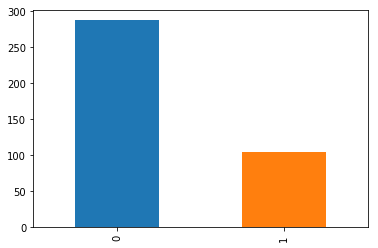

In [107]:
cars2['Group'].value_counts().plot(kind='bar')

In [108]:
final_model1=KMeans(3)
final_model1.fit(cars1)
prediction=final_model1.predict(cars1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [109]:
cars3= cars1
cars3['Group'] = prediction
cars3.head()
cars3.Group.value_counts()

cyl      disp        hp        wt       acc  \
car name                                                                      
chevrolet chevelle malibu  1.483947  1.077290  0.664133  0.620540 -1.285258   
buick skylark 320          1.483947  1.488732  1.574594  0.843334 -1.466724   
plymouth satellite         1.483947  1.182542  1.184397  0.540382 -1.648189   
amc rebel sst              1.483947  1.048584  1.184397  0.536845 -1.285258   
ford torino                1.483947  1.029447  0.924265  0.555706 -1.829655   

                                 yr       mpg  Group  
car name                                              
chevrolet chevelle malibu -1.625315 -0.698638      2  
buick skylark 320         -1.625315 -1.083498      2  
plymouth satellite        -1.625315 -0.698638      2  
amc rebel sst             -1.625315 -0.955212      2  
ford torino               -1.625315 -0.826925      2

0    154
1    138
2    100
Name: Group, dtype: int64

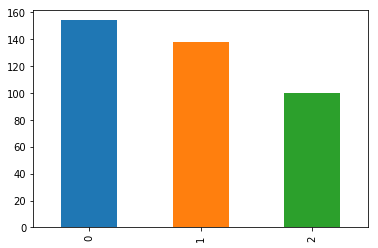

In [110]:
cars3['Group'].value_counts().plot(kind='bar')

Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points

In [111]:
group_0=cars3[cars3['Group']==0]
group_1=cars3[cars3['Group']==1]
group_2=cars3[cars3['Group']==2]

In [112]:
group_0.shape
group_1.shape
group_2.shape
group_0.head(2)

(154, 8)

(138, 8)

(100, 8)

cyl      disp        hp        wt       acc  \
car name                                                                  
toyota corona mark ii -0.864014 -0.778984 -0.246329 -0.713864 -0.196464   
plymouth duster        0.309967  0.034332 -0.246329 -0.170436 -0.014999   

                             yr       mpg  Group  
car name                                          
toyota corona mark ii -1.625315  0.071081      0  
plymouth duster       -1.625315 -0.185492      0

In [113]:
#Performing Linear Regression on Cluster1(group_0)
X_0 = group_0[["cyl","disp","hp","wt","acc","yr"]]
Y_0 = group_0['mpg']
X_1 = group_1[["cyl","disp","hp","wt","acc","yr"]]
Y_1 = group_1['mpg']
X_2 = group_2[["cyl","disp","hp","wt","acc","yr"]]
Y_2 = group_2['mpg']

In [114]:
X0_train,X0_test,Y0_train,Y0_test = train_test_split(X_0,Y_0,test_size=0.3,random_state=0)
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X_1,Y_1,test_size=0.3,random_state=0)
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X_2,Y_2,test_size=0.3,random_state=0)

In [115]:
lr_0 = LinearRegression().fit(X0_train,Y0_train)
lr_1 = LinearRegression().fit(X1_train,Y1_train)
lr_2 = LinearRegression().fit(X2_train,Y2_train)

In [116]:
lr_0.score(X0_train,Y0_train)
lr_1.score(X1_train,Y1_train)
lr_2.score(X2_train,Y2_train)

0.5152306250856524

0.539778446258917

0.6355074861219288

In [117]:
lr_0.score(X0_test,Y0_test)
lr_1.score(X1_test,Y1_test)
lr_2.score(X2_test,Y2_test)

0.6624971563814958

0.46415823585609073

0.37158049846766616

In [118]:
y0_predict= lr_0.predict(X0_test)
y1_predict= lr_1.predict(X1_test)
y2_predict= lr_2.predict(X2_test)

In [119]:
rmse_0 = sqrt(mean_squared_error(y_true=Y0_test,y_pred=y0_predict))
rmse_1 = sqrt(mean_squared_error(y_true=Y1_test,y_pred=y1_predict))
rmse_2 = sqrt(mean_squared_error(y_true=Y2_test,y_pred=y2_predict))
rmse_0
rmse_1
rmse_2

0.23365523008537767

0.4351780678353186

0.27280062722401155

In [120]:
lr_0.coef_
lr_1.coef_
lr_2.coef_



array([ 0.1469652 , -0.2125422 , -0.27645939, -0.46453102, -0.08295712,
        0.18732024])

array([ 1.03060011, -0.25431505, -0.55068923, -0.65372166,  0.0587473 ,
        0.46685167])

array([-0.02711184, -0.10847201, -0.1471762 , -0.08141093, -0.17911229,
        0.21001514])

## Case Study-2
The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Dataset: vehicle
Steps to follow:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)
Please name your file in the following format - CourseName_ResidencyNumber_CasestudyNumber_Title.ipynb
For Ex - Unsupervised Learning_R5_Casestudy1_Car mpg.ipynb



In [121]:
vehicle = pd.read_csv('vehicle.csv')

In [122]:
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [123]:
vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [124]:
vehicle.shape

(846, 19)

In [125]:
vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [126]:
vehicle.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [127]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [128]:
#We could see there are so many null values around in the dataset

In [129]:
#Imputing the missing values with the mean
vehicle.fillna(vehicle.mean(), inplace=True)

In [130]:
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019AB9B93DD8>,
      dtype=object)

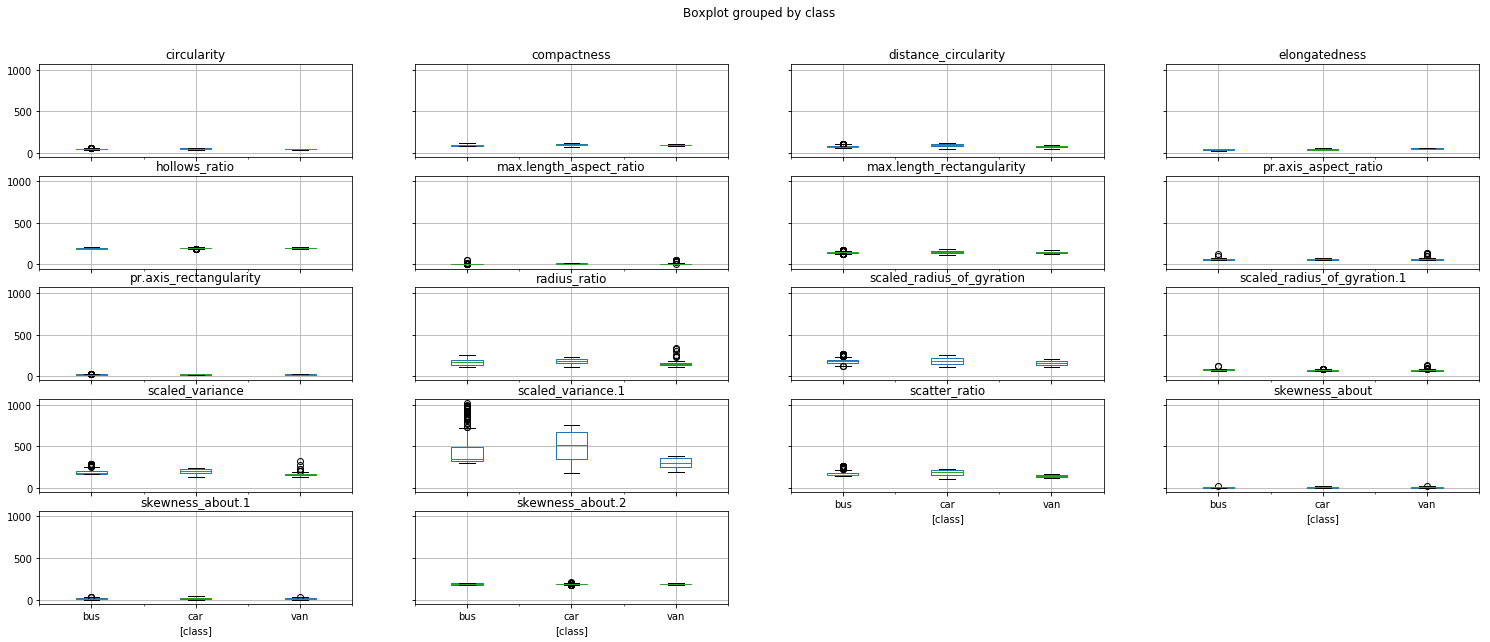

In [131]:
vehicle.boxplot(by="class",figsize=(25,10))

In [132]:
df = vehicle.drop('class' , axis =1)

In [133]:
#Remove the Outiers from the dataframe
from scipy import stats

df_new = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [134]:
df_new = pd.concat([vehicle.loc[:,'class'], df_new], axis=1)

In [135]:
df_new.shape

(846, 19)

In [136]:
df_new.isnull().values.any()

True

In [137]:
df_new.dropna(inplace=True)
df_new.head()

class  compactness  circularity  distance_circularity  radius_ratio  \
0   van         95.0    48.000000                  83.0         178.0   
1   van         91.0    41.000000                  84.0         141.0   
2   car        104.0    50.000000                 106.0         209.0   
3   van         93.0    41.000000                  82.0         159.0   
5   bus        107.0    44.828775                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
5                  50.0                      6.0          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
5           26.0                    28.0                      169.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
5             181.0          183.0

In [138]:
df_new.shape

(824, 19)

Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

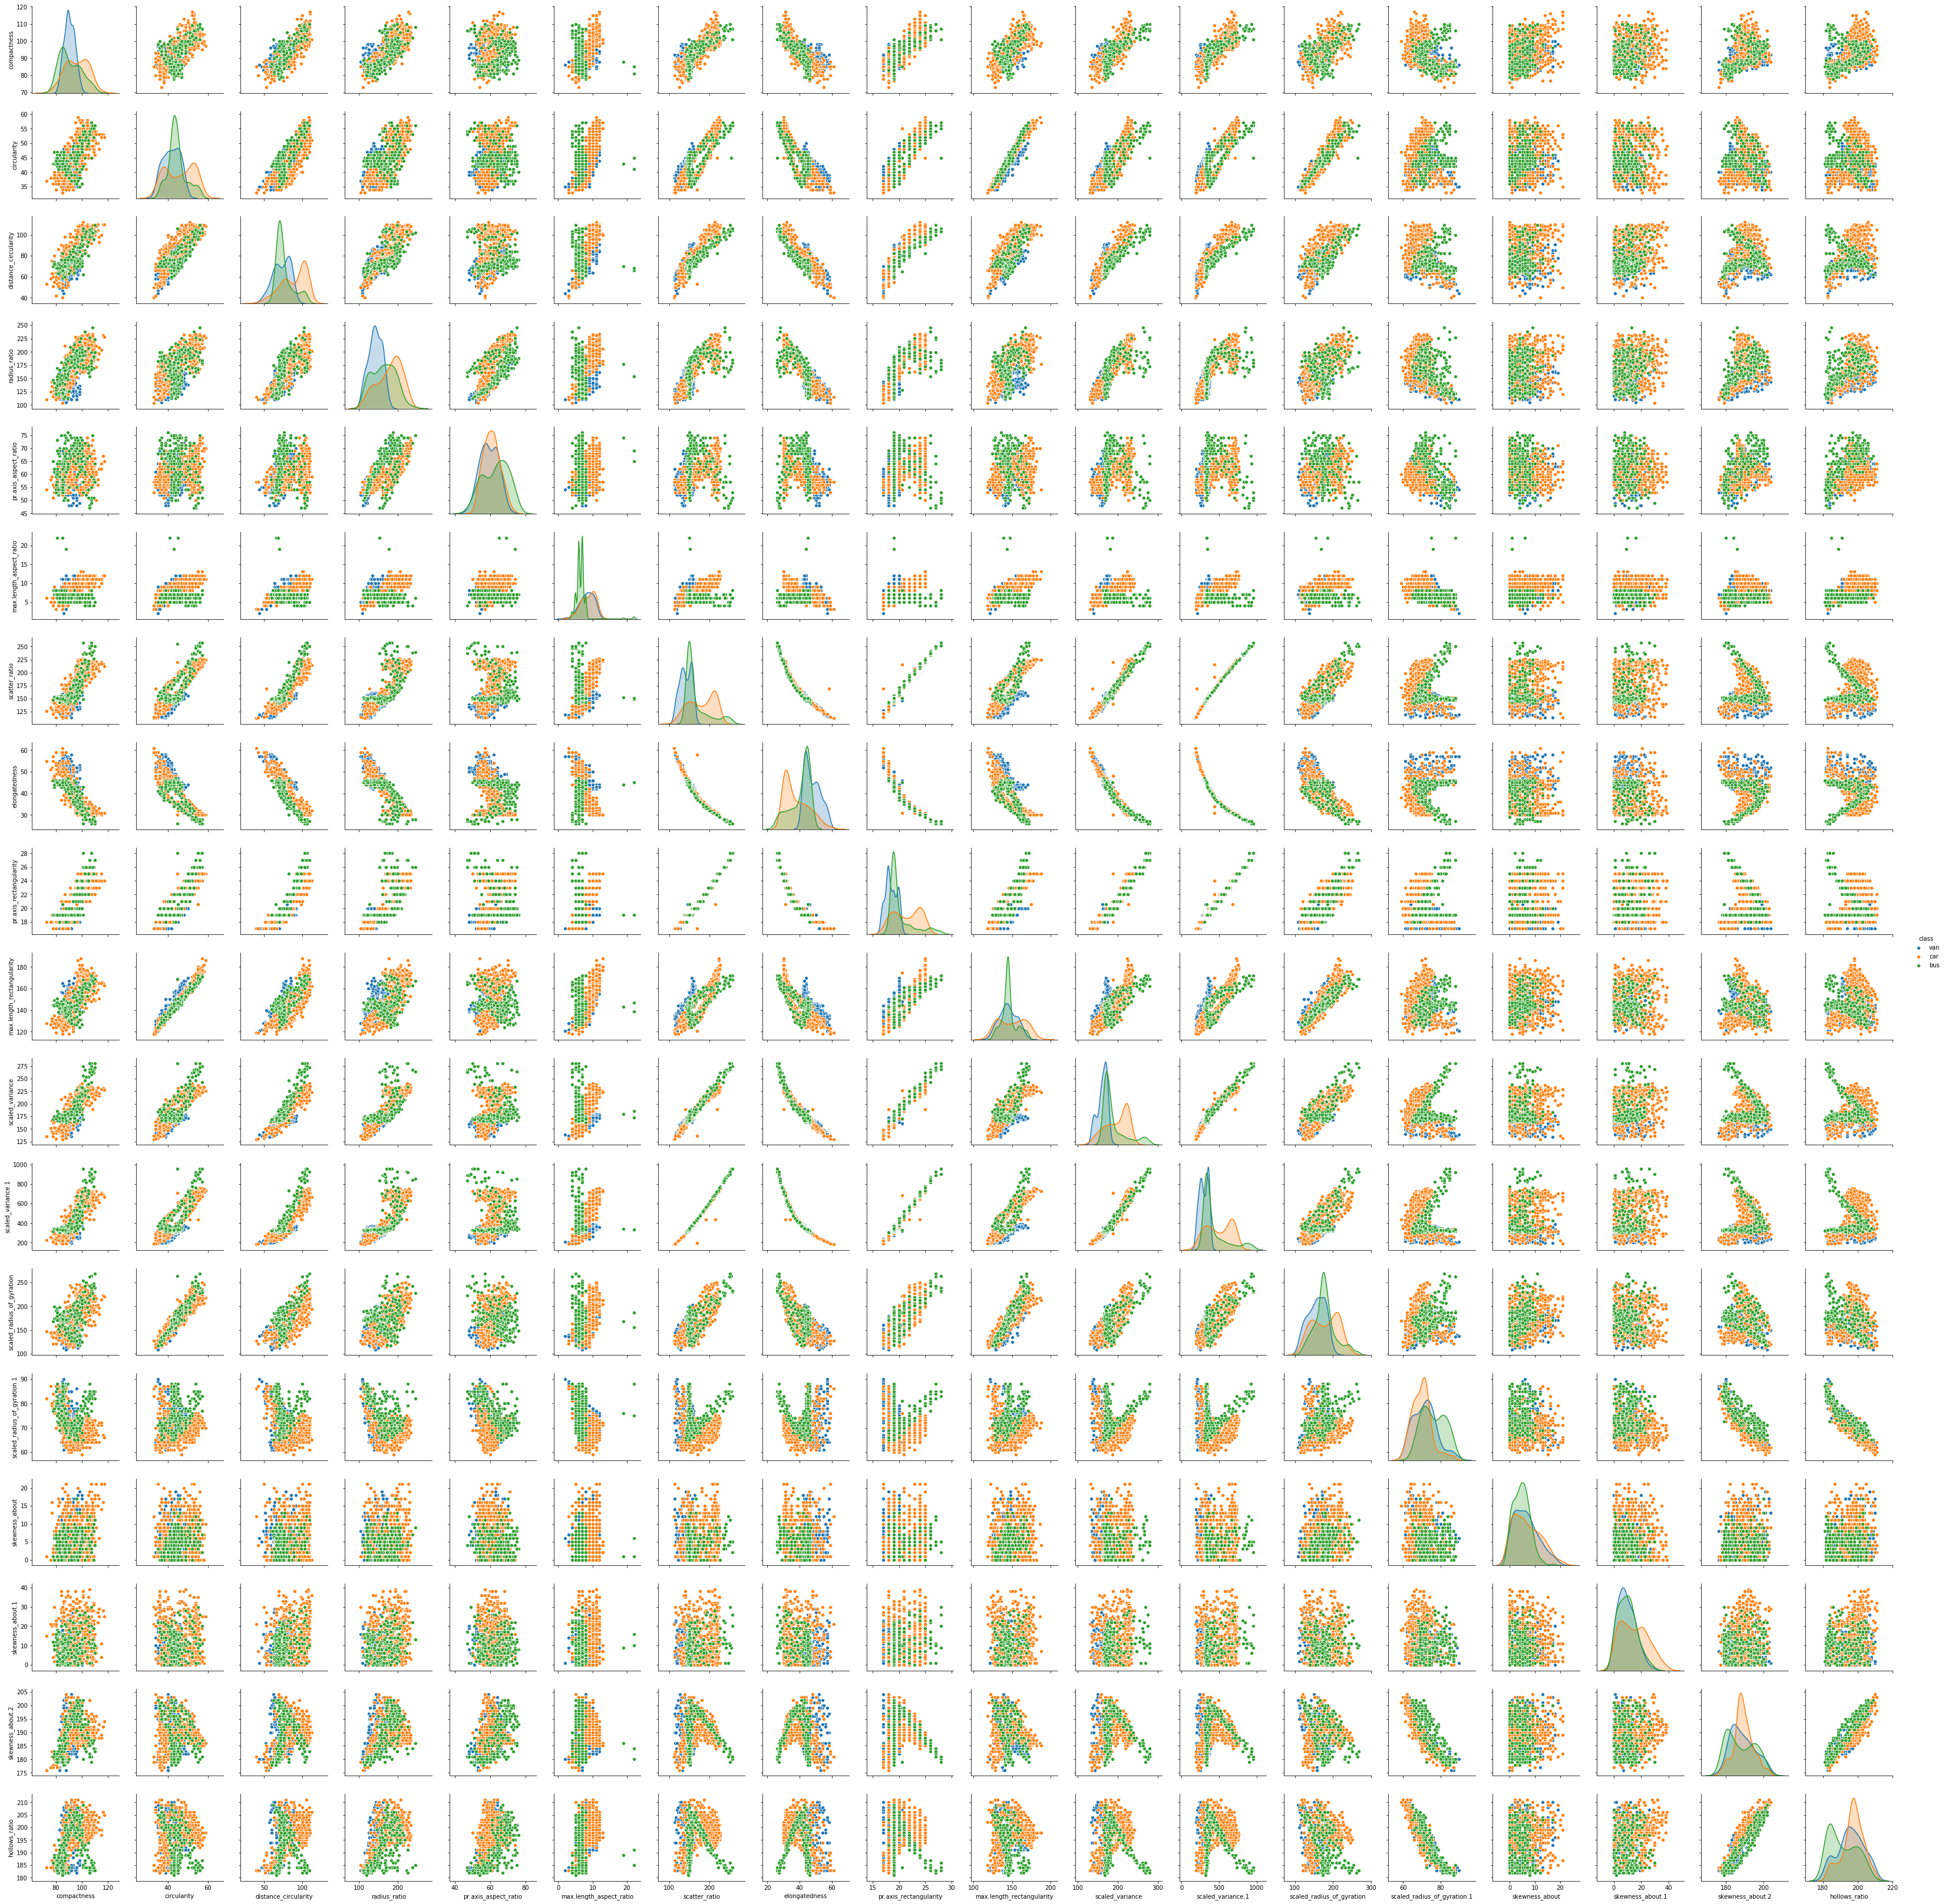

In [139]:
sns.pairplot(df_new , hue='class')

In [140]:
vehicle.corr()
corr = vehicle.corr().abs().unstack().sort_values(ascending = False).drop_duplicates()
#cor = pd.DataFrame(corr)
corr


compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr.axis_aspect_ratio            0.091704     0.153362              0.158397   
max.length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762770     0.796822              0.861980   
scaled_variance.1               0.815901     0.838525              0.887328   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.250071     0.052642             -0.225852   
skewness_about                  0.235687     0.144394              0.113813   
skewness_about.1                0.157387    -0.011851              0.265553   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689840              0.091704   
circularity                      0.620967              0.153362   
distance_circularity             0.767079              0.158397   
radius_ratio                     1.000000              0.663559   
pr.axis_aspect_ratio             0.663559              1.000000   
max.length_aspect_ratio          0.450036              0.648704   
scatter_ratio                    0.734228              0.103715   
elongatedness                   -0.789795             -0.183264   
pr.axis_rectangularity           0.708285              0.079395   
max.length_rectangularity        0.569205              0.127128   
scaled_variance                  0.794041              0.273414   
scaled_variance.1                0.720150              0.089620   
scaled_radius_of_gyration        0.536536              0.122111   
scaled_radius_of_gyration.1     -0.180819              0.152776   
skewness_about                   0.048720             -0.058481   
skewness_about.1                 0.173832             -0.032134   
skewness_about.2                 0.382129              0.239849   
hollows_ratio                    0.471262              0.267724   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812235   
circularity                                 0.251208       0.848207   
distance_circularity                        0.264550       0.904400   
radius_ratio                                0.450036       0.734228   
pr.axis_aspect_ratio                        0.648704       0.103715   
max.length_aspect_ratio                     1.000000       0.165967   
scatter_ratio                               0.165967       1.000000   
elongatedness                              -0.180041      -0.970723   
pr.axis_rectangularity                      0.161592       0.989370   
max.length_rectangularity                   0.305943       0.808356   
scaled_variance                             0.318955       0.948296   
scaled_variance.1                           0.143713       0.993784   
scaled_radius_of_gyration                   0.189704       0.799266   
scaled_radius_of_gyration.1                 0.295574      -0.027985   
skewness_about                              0.015439       0.074308   
skewness_about.1                            0.043489       0.213127   
skewness_about.2                           -0.

hollows_ratio                hollows_ratio                1.000000
scaled_variance.1            scatter_ratio                0.993784
pr.axis_rectangularity       scaled_variance.1            0.989490
                             scatter_ratio                0.989370
scatter_ratio                elongatedness                0.970723
circularity                  max.length_rectangularity    0.961943
elongatedness                scaled_variance.1            0.955074
pr.axis_rectangularity       elongatedness                0.949077
scatter_ratio                scaled_variance              0.948296
scaled_variance              scaled_variance.1            0.947021
elongatedness                scaled_variance              0.936715
pr.axis_rectangularity       scaled_variance              0.934568
scaled_radius_of_gyration    circularity                  0.926888
distance_circularity         elongatedness                0.911435
                             scatter_ratio                0.90

In [141]:

##most of the variables are more correlated with each other

3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [143]:
df1 =df_new.drop('class' , axis =1)
dfnorm= df1.apply(zscore)
dfnorm['class'] = df_new['class']
dfnorm.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.179512     0.532301              0.067472      0.325348   
1    -0.315197    -0.616473              0.131263     -0.836877   
2     1.292608     0.860522              1.534654      1.299103   
3    -0.067842    -0.616473              0.003682     -0.271470   
5     1.663639     0.011869              1.534654      0.136879   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.918617                 0.828137      -0.196387   
1             -0.746595                 0.377420      -0.596793   
2              0.852532                 0.828137       1.189635   
3              0.319490                 0.377420      -0.750795   
5             -1.990361                -0.974729       2.668057   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.127417               -0.213232                   0.774827   
1       0.514333               -0.610081                  -0.331685   
2      -1.162301                0.977313                   0.705670   
3       0.643304               -0.610081                  -0.331685   
5      -1.936132                2.961555                   1.466398   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.382317          -0.334761                   0.309617   
1        -0.583358          -0.620838                  -0.504619   
2         1.192510           1.159848                   1.437020   
3        -0.918428          -0.743443                  -1.475438   
5         3.102407           3.039785                   2.814958   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327652       -0.058340          0.395035   
1                    -0.009234        0.568187          0.168073   
2                     0.149975        1.612400         -0.399332   
3                    -1.442117       -0.058340         -0.285851   
5                     2.060486       -0.267183         -0.399332   

   skewness_about.2  hollows_ratio class  
0         -0.319869       0.180699   van  
1          0.006552       0.452406   van  
2         -0.156658       0.044845   car  
3          1.638656       1.539235   van  
5         -1.299131      -1.721252   bus

In [144]:
X = dfnorm.drop('class',axis=1)
Y = dfnorm.pop('class')


In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, 
                                                    stratify=Y, 
                                                    random_state=0)

In [146]:
#Centering the data
X_centered = X - X.mean(axis=0)

In [147]:
ranges = range(1,10)
variance = []
for i in ranges:
    pca = PCA(n_components=i)
    pca.fit(X_centered)
    X_pca = pca.transform(X_centered)
    X_pca.shape
    #print(pca.components_)
    #print(pca.explained_variance_)
    pca.explained_variance_ratio_
    var =(np.cumsum(pca.explained_variance_ratio_)*100)
    var

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(824, 1)

array([0.5465696])

array([54.65695982])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(824, 2)

array([0.5465696 , 0.18315975])

array([54.65695982, 72.97293475])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(824, 3)

array([0.5465696 , 0.18315975, 0.06680134])

array([54.65695982, 72.97293475, 79.65306915])

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(824, 4)

array([0.5465696 , 0.18315975, 0.06680134, 0.0625943 ])

array([54.65695982, 72.97293475, 79.65306915, 85.91249949])

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(824, 5)

array([0.5465696 , 0.18315975, 0.06680134, 0.0625943 , 0.04888935])

array([54.65695982, 72.97293475, 79.65306915, 85.91249949, 90.80143486])

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(824, 6)

array([0.5465696 , 0.18315975, 0.06680134, 0.0625943 , 0.04888935,
       0.0369672 ])

array([54.65695982, 72.97293475, 79.65306915, 85.91249949, 90.80143486,
       94.49815502])

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(824, 7)

array([0.5465696 , 0.18315975, 0.06680134, 0.0625943 , 0.04888935,
       0.0369672 , 0.01885149])

array([54.65695982, 72.97293475, 79.65306915, 85.91249949, 90.80143486,
       94.49815502, 96.38330434])

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(824, 8)

array([0.5465696 , 0.18315975, 0.06680134, 0.0625943 , 0.04888935,
       0.0369672 , 0.01885149, 0.01264022])

array([54.65695982, 72.97293475, 79.65306915, 85.91249949, 90.80143486,
       94.49815502, 96.38330434, 97.6473261 ])

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(824, 9)

array([0.5465696 , 0.18315975, 0.06680134, 0.0625943 , 0.04888935,
       0.0369672 , 0.01885149, 0.01264022, 0.0066288 ])

array([54.65695982, 72.97293475, 79.65306915, 85.91249949, 90.80143486,
       94.49815502, 96.38330434, 97.6473261 , 98.31020651])

In [148]:
#to get ~0.95 variance required components=7

Text(0.5, 0, 'no of components')

Text(0, 0.5, 'Variance')

Text(0.5, 1.0, 'Selecting pca with the Elbow Method')

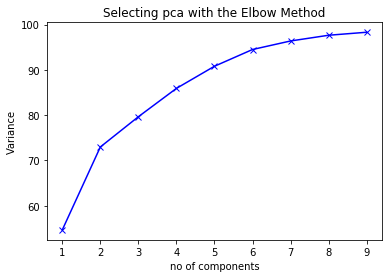

In [149]:
plt.plot(ranges,var,'bx-')
plt.xlabel('no of components')
plt.ylabel('Variance')
plt.title('Selecting pca with the Elbow Method')

In [150]:
#at PCA= 7 we are getting a variance of 96%

In [151]:
pca7 = PCA(n_components=7)
pca7.fit(X_centered)
X_pca = pca7.transform(X_centered)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [152]:
from sklearn.svm import SVC

In [153]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.model_selection import cross_val_score

In [154]:
param_grid = [    {        
     'kernel': ['linear', 'rbf'],        
     'C': [0.01,0.05,0.5,1]
              } ]

In [155]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [156]:
gs.fit(pca7.transform(X_train), Y_train) 

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [157]:
gs.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [158]:
gs.best_score_ 

0.9114583333333334

In [159]:
SC = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

SC.fit(pca7.transform(X_train),Y_train)
Y_predict = SC.predict(pca7.transform(X_test))
score = SC.score(pca7.transform(X_test),Y_test)
print('Score',score)
print('Confusion Matrix \n',confusion_matrix(Y_test, Y_predict))
print('Recall Score \n',recall_score(Y_test, Y_predict, average = 'micro'))
#print('Auc \n',roc_auc_score(Y_test, Y_predict))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Score 0.9233870967741935
Confusion Matrix 
 [[ 60   2   1]
 [  2 123   2]
 [  2  10  46]]
Recall Score 
 0.9233870967741935


In [160]:
accuracy = cross_val_score(SC, X, Y, scoring='accuracy', cv = 8).mean() * 100
accuracy

97.208554818492